# Visualization of stellar wind

In [2]:
outfile_stem="f01"
from IPython.display import Image
# Plotly offline
import plotly.offline as offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
from astropy import units as u
from astropy.constants import M_sun, R_sun, c, m_p

# Wind parameter
v_term = 1000 * u.km / u.s
dm_dt = 1e-6 * u.solMass / u.year
betas=[0.0, 0.5, 0.75, 1.0]
# Cen X-3 parameter
r0 = 12.0 * u.solRad
a = c*(39.6612*u.second)/np.sin(np.deg2rad(70.2))

In [6]:
rs=[i*a for i in np.linspace(0,10,1001)]
def get_vr(v_term, beta, r, r0):
    vr= v_term * (1.0-r0/r)**(beta)
    if (vr < 0):
        vr = np.nan
    else:
        vr = vr.to(u.km/u.second).value
    return vr
def get_n(r, vr, dm_dt):
    n = dm_dt / m_p / (4.0*np.pi*r*r) / vr
    return n.to(1/u.cm/u.cm/u.cm).value

In [7]:
fig = make_subplots(rows=1, cols=1)
fig.update_layout(height=600, width=800)
fig.update_xaxes(type="linear", title="Distance (binary separation)", range=[0,5])
fig.update_yaxes(type="log", title="Radial velocity (km/s)")
fig.update_layout(legend=dict(
    x=0.99, y=0.01,
    xanchor='right', yanchor='bottom',
    orientation='v',
    itemsizing='constant'
))

for beta in betas:
    vrs = [get_vr(v_term, beta, r, r0) for r in rs]
    Xs = [(r/a).decompose().value for r in rs]
    Ys = [vr for vr in vrs]
    trace = go.Scatter(
        showlegend=True,
        name="{}".format(beta),
        x=Xs,
        y=Ys,
        mode="lines",
        #line_color='black',
        line_dash='solid',
        line_width=2,
        )
    fig.add_trace(trace)

offline.iplot(fig)
outfile="{}a.png".format(outfile_stem)
fig.write_image(outfile)
Image(outfile)

/usr/local/anaconda3/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning:

divide by zero encountered in divide

/usr/local/anaconda3/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/anaconda3/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning:

invalid value encountered in power



/usr/local/anaconda3/lib/python3.10/site-packages/astropy/units/quantity.py:671: RuntimeWarning:

invalid value encountered in divide



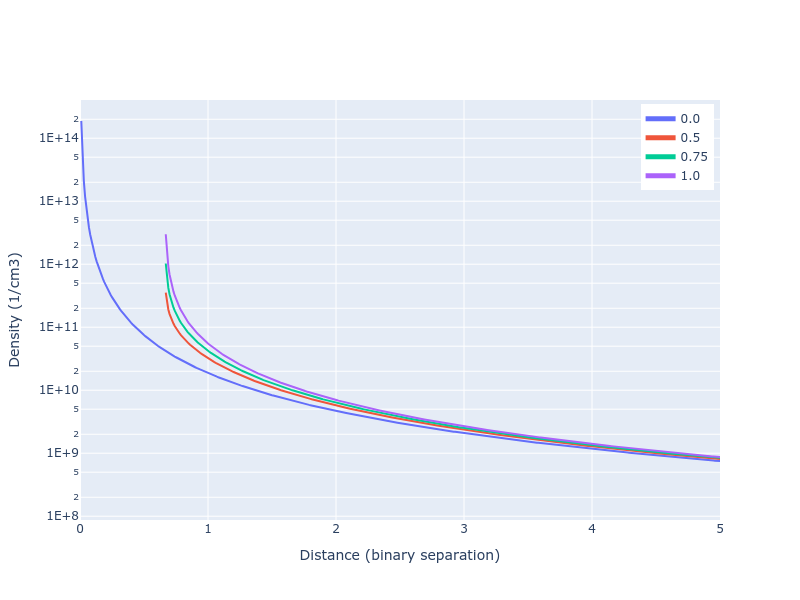

In [8]:
fig = make_subplots(rows=1, cols=1)
fig.update_layout(height=600, width=800)
fig.update_xaxes(type="linear", title="Distance (binary separation)", range=[0,5])
fig.update_yaxes(type="log", title="Density (1/cm3)", showexponent="all", exponentformat='E')
fig.update_layout(legend=dict(
    x=0.99, y=0.99,
    xanchor='right', yanchor='top',
    orientation='v',
    itemsizing='constant'
))

for beta in betas:
    vrs = [get_vr(v_term, beta, r, r0)*(u.km/u.second) for r in rs]
    Xs = [(r/a).decompose().value for r in rs]
    Ys = [get_n(r, vr, dm_dt) for r, vr in zip(rs, vrs)]
        
    trace = go.Scatter(
        showlegend=True,
        name="{}".format(beta),
        x=Xs,
        y=Ys,
        mode="lines",
        #line_color='black',
        line_dash='solid',
        line_width=2,
        )
    fig.add_trace(trace)

offline.iplot(fig)
outfile="{}b.png".format(outfile_stem)
fig.write_image(outfile)
Image(outfile)

In [9]:
fig = make_subplots(rows=1, cols=1)
fig.update_layout(height=600, width=800)
fig.update_xaxes(type="linear", title="Distance (binary separation)", range=[0,5])
fig.update_yaxes(type="log", title="Cumulative column (1/cm2)", showexponent="all", exponentformat='E')
fig.update_layout(legend=dict(
    x=0.99, y=0.99,
    xanchor='right', yanchor='top',
    orientation='v',
    itemsizing='constant'
))

for beta in betas:
    vrs = [get_vr(v_term, beta, r, r0)*(u.km/u.second) for r in rs]
    Xs = [(r/a).decompose().value for r in rs]
    Ys = [get_n(r, vr, dm_dt)*r.to(u.cm).value for r, vr in zip(rs, vrs)]
        
    trace = go.Scatter(
        showlegend=True,
        name="{}".format(beta),
        x=Xs,
        y=Ys,
        mode="lines",
        #line_color='black',
        line_dash='solid',
        line_width=2,
        )
    fig.add_trace(trace)

offline.iplot(fig)
outfile="{}c.png".format(outfile_stem)
fig.write_image(outfile)
Image(outfile)

/tmp/ipykernel_26282/911607427.py:15: RuntimeWarning:

invalid value encountered in scalar multiply



/tmp/ipykernel_26282/3125942547.py:17: RuntimeWarning:

invalid value encountered in scalar multiply



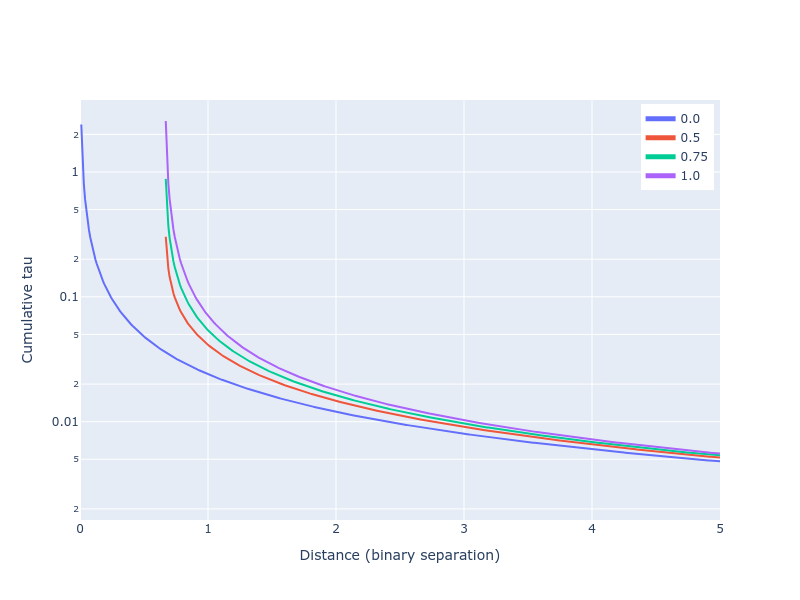

In [10]:
A_Fe = 2.69e-5
sigma = 3.764E+04 * 1e-24
fig = make_subplots(rows=1, cols=1)
fig.update_layout(height=600, width=800)
fig.update_xaxes(type="linear", title="Distance (binary separation)", range=[0,5])
fig.update_yaxes(type="log", title="Cumulative tau", showexponent="all", exponentformat='E')
fig.update_layout(legend=dict(
    x=0.99, y=0.99,
    xanchor='right', yanchor='top',
    orientation='v',
    itemsizing='constant'
))

for beta in betas:
    vrs = [get_vr(v_term, beta, r, r0)*(u.km/u.second) for r in rs]
    Xs = [(r/a).decompose().value for r in rs]
    Ys = [get_n(r, vr, dm_dt)*r.to(u.cm).value*A_Fe*sigma for r, vr in zip(rs, vrs)]
        
    trace = go.Scatter(
        showlegend=True,
        name="{}".format(beta),
        x=Xs,
        y=Ys,
        mode="lines",
        #line_color='black',
        line_dash='solid',
        line_width=2,
        )
    fig.add_trace(trace)

offline.iplot(fig)
outfile="{}d.png".format(outfile_stem)
fig.write_image(outfile)
Image(outfile)